# Assignment 1 - Linear Regression

$\textbf{NAME : CHAITANYA DARADE}$

# Introduction


The aim of this assignment is to understand how linear regression works and to visualize and observe the data to find correlation to reuse this data for linear regression.

* $\textbf{Linear Regression}$:
    
Linear regression is a simple approach to supervised learning. It assumes that the dependence of Y on X1, X2, . . . Xn is linear. It is the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable and association between two variables can be measured by correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables.

In this assignment, diamonds dataset is used for regression and two methods are used namely 'Least-Squares Regression (LS)' and 'Least Mean Squares (LMS)' to find a best fitting line for the observed data.

* $\textbf{Least-Squares Regression (LS)}$:

The most common method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line.

* $\textbf{Least-Mean Squares Regression (LMS)}$:

Though LS is commonly used, it has computation limitations for large datasets, where online learning is preferred where data point is introduced one by one, and parameters are updated. Using the updated parameters, it makes a new estimation and repeat these steps.

# Data - description

This dataset comprises prices of 50,000 round cut diamonds. It's containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

* $\textbf{File information}$ :

diamonds.csv (53940*10)

* $\textbf{Attribute Information}$:

A data frame with 53940 rows and 10 variables:

1 : price price in US dollars ( 326 – 18,823)

2 : carat weight of the diamond (0.2–5.01)

3 : cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4 : color diamond colour, from J (worst) to D (best)

5 : clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6 : x length in mm (0–10.74)

7 : y width in mm (0–58.9)

8 : z depth in mm (0–31.8)

9 : depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

10: table width of top of diamond relative to widest point (43–95)    

11: dimension volume of the diamond(Additional feature ‘dimension ’is added to understand the volume(i.e dimension)       of diamond.)

Source : shivamagrawal, "Analyze diamonds by their cut, color, clarity, price, and other attributes" https://www.kaggle.com/shivam2503/diamonds#diamonds.csv

# Data - Plots for understanding and Preliminary observation

## Reading the Data

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

diamonds_data=pd.read_csv('diamonds.csv',index_col=0)
print(diamonds_data.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [73]:
diamonds_data.shape

(53940, 10)

In [74]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [75]:
# It seems there are no Null Values.
# Let's Confirm
diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [76]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Correlation Between Features

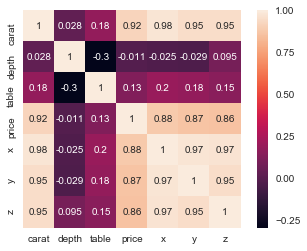

In [77]:
corr = diamonds_data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In order to make a correlation between all independent variables to that of dependent variable, encoding the categorical variables is essential step.

### Encoding

In [78]:
labelencoder = LabelEncoder()
diamonds_data['cut'] = labelencoder.fit_transform(diamonds_data['cut'])
diamonds_data['color'] = labelencoder.fit_transform(diamonds_data['color'])
diamonds_data['clarity'] = labelencoder.fit_transform(diamonds_data['clarity'])

In [79]:
corr = diamonds_data.corr()
round(corr,2)

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.95,0.95
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.26,0.27
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.22
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,0.03,0.26,-0.22,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.00,0.27,-0.22,0.09,0.15,0.86,0.97,0.95,1.00


## Visualization Of All Features

### Carat vs Price

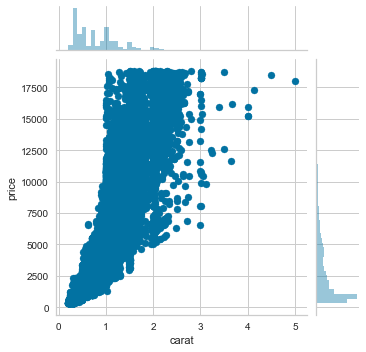

In [80]:
sns.jointplot(x='carat' , y='price' , data=diamonds_data , height=5)

#### Carat varies with Price Exponentially

### Cut vs Price

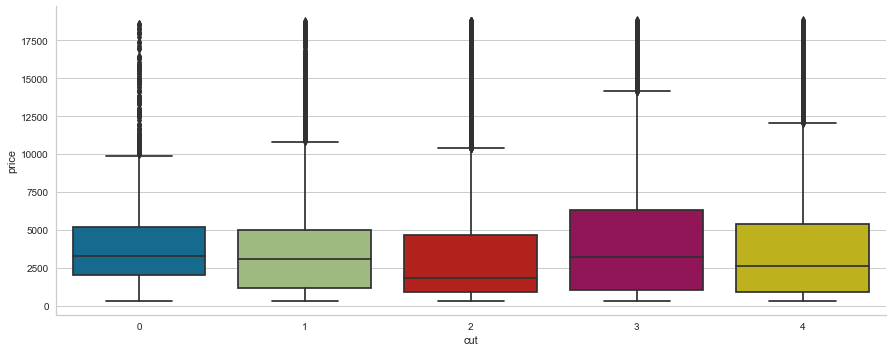

In [81]:
sns.catplot(x='cut', y='price', data=diamonds_data, kind='box' ,aspect=2.5 )

#### Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

### Clarity vs Price

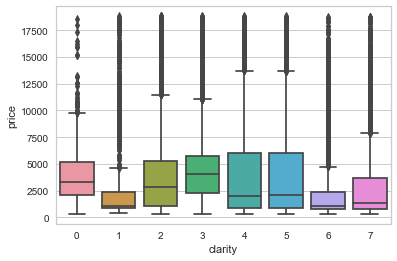

In [82]:
sns.boxplot(x='clarity', y='price', data=diamonds_data )

#### It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin

### Depth vs Price

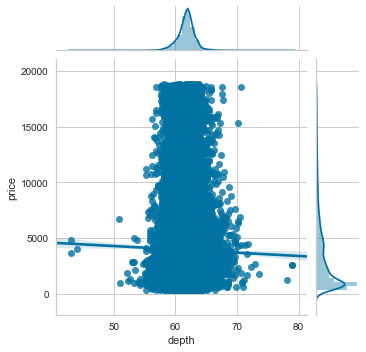

In [83]:
sns.jointplot(x='depth', y='price' , data=diamonds_data , kind='regplot', height=5)

#### We can Infer from the plot that the Price can vary heavily for the same Depth and And the Pearson's Correlation shows that there's a slightly inverse relation between the two.

### Dimension vs Price

(2, 10)

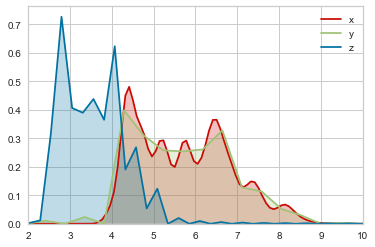

In [84]:
sns.kdeplot(diamonds_data['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds_data['y'] , shade=True , color='g' )
sns.kdeplot(diamonds_data['z'] , shade= True , color='b')
plt.xlim(2,10)

#### We'll Create a New Feature based on the Dimensions in the Next Section called 'Dimension' and Visualize how it affects the Price.

## Observatory Conclusions

1.  Depth is inversely related to Price.
       This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
       

2.  The Price of the Diamond is highly correlated to Carat, and its Dimensions.


3.  The Weight (Carat) of a diamond has the most significant impact on its Price. 
       Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
       
    
4.  The Length(x), Width(y) and Depth(z) seems to be higly related to Price and even each other.


5.  Self Relation ie. of a feature to itself is 1 as expected.


6.  Some other Inferences can also be drawn.

# Data - Preprocessing of the data

In [85]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Feature Extraction

Creating a new Feature based on the Dimensions in the Next Section called 'Dimension' to Visualize how it affects the Price.

In [86]:
diamonds_data['dimension'] = diamonds_data['x'] * diamonds_data['y'] * diamonds_data['z']

## Encoding 

Encoding Categorical Variables 'Cut', 'Color', 'Clarity'

In [87]:
labelencoder = LabelEncoder()
diamonds_data['cut'] = labelencoder.fit_transform(diamonds_data['cut'])
diamonds_data['color'] = labelencoder.fit_transform(diamonds_data['color'])
diamonds_data['clarity'] = labelencoder.fit_transform(diamonds_data['clarity'])

In [88]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [89]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


From above descriptive data, its not possible to have either of Length or Width or Depth to be zero Let see how much such data is present:

In [90]:
diamonds_data.loc[(diamonds_data['dimension']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
2208,1.00,3,3,3,59.1,59.0,3142,6.55,6.48,0.0,0.0
2315,1.01,3,4,0,58.1,59.0,3167,6.66,6.60,0.0,0.0
4792,1.10,3,3,3,63.0,59.0,3696,6.50,6.47,0.0,0.0
5472,1.01,3,2,3,59.2,58.0,3837,6.50,6.47,0.0,0.0
10168,1.50,1,3,0,64.0,61.0,4731,7.15,7.04,0.0,0.0
11183,1.07,2,2,3,61.6,56.0,4954,0.00,6.62,0.0,0.0
11964,1.00,4,4,5,63.3,53.0,5139,0.00,0.00,0.0,0.0
13602,1.15,2,3,5,59.2,56.0,5564,6.88,6.83,0.0,0.0
15952,1.14,0,3,4,57.5,67.0,6381,0.00,0.00,0.0,0.0
24395,2.18,3,4,3,59.4,61.0,12631,8.49,8.45,0.0,0.0


In [91]:
len(diamonds_data.loc[(diamonds_data['x']==0) | (diamonds_data['y']==0) | (diamonds_data['z']==0)])

20

There are 20 rows with Dimensions 'Zero'.Dropping them as it seems better choice instead of filling them with any of Mean or Median.

In [92]:
diamonds_data.drop(diamonds_data[diamonds_data['dimension'] == 0].index, inplace = True) 

In [93]:
diamonds_data.loc[(diamonds_data['x']==0) | (diamonds_data['y']==0) | (diamonds_data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension


In [94]:
corr = diamonds_data.corr()
round(corr,2)

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.95,0.96,0.98
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00,0.02
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.26,0.27,0.28
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.23,-0.21
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.10,0.01
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.18,0.15,0.17
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.89,0.87,0.87,0.90
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.89,1.00,0.97,0.98,0.96
y,0.95,0.03,0.26,-0.22,-0.03,0.18,0.87,0.97,1.00,0.96,0.98
z,0.96,0.00,0.27,-0.23,0.10,0.15,0.87,0.98,0.96,1.00,0.95


As independent variables such as 'Carat' and 'Length'(x),'Width'(y),'Depth'(z) (combined in feature 'dimension') are highly correlated to dependant variable 'price'. These four features will be considered for training the model whereas price is dependant variable. 

In [95]:
X_Dataframe = diamonds_data[['carat','dimension']]  # It's a Training dataframe, partitioned afterwards
y_Dataframe = diamonds_data['price']                # Depandant variable

# Method 

## Review

In the regression problems our target values are real numbers and our goal is to find best fit line for our
data. so simple line equation is:

$$f(x;w)={w_{1}x + w_{0}}$$
                                    
If we have multiple inputs for x:
$$f(x;w)={w_{D}x_{D} + .... + w_{1}x_{1} + w_{0}}$$

where D, is the number of attributes or feature in our input data.

So main idea behind getting best fit line is find and minimize the cost/Error function. By minimizing
error function we mean, minimize the sum of Euclidean distances between target values and our
predicted values.

$$E(w) = \Sigma_{i=1}^{N}{(f(x_{i};w_{i}) - t_{i})}^{2}$$


1. For the Least squares we try to minimize the above mentioned error function. Above
mentioned equation is quadratic equation, we will get minimum value by taking derivative of
that eqaution with respect to the 'w' and put that equal to 0. After solving we will get: 

$$ w={(X^{T}X)}^{-1}X^{T}t $$

   where, X = Input matrix of N * D (N = Number of samples and D = Number of attributes)

   t = Matrix of the target value
   w = Matrix of the weights corresponding to each attribute
   
   

2. Least Mean Squares: Unlike Least Squares method it does not use all the data available in
one go but, it follows the Online Learning process. By this we mean that we calculate the
value of weight at each iteration (for each datapoint) and based on calculated values in
previous step, it makes new estimation.

  It is represented as:          
$$w^{k+1} = w^{k} - \alpha\nabla E_{k}$$     
                
  For this equation, We initially guess the value of 'w'

  k = represents the steps in repetition

  $E_{k}$ = represents the error rate for k sample.

  $\alpha$ = Learning Rate Further, we calculate the gradient i.e. \nabla E_{k} and finally gets:
  
$$w^{k+1} = w^{k} - \alpha({w^{k}}^{T} - t_{k})x_{k}$$
                                  
This is final weight vector, LMS will compute for each sample and this process can be
repeated for any nnumber of times to get the best weight (which give us best fitting line for
our data points).

## Explanation of Code

Two algorithms are implemented as part of implementaion i.e Least Squares and Least Mean
Squares. A base class BaseModel is implemented which is having only two abstract method 'train'
and 'use', and they are defined further in different classes which are inheritig BaseModel class.
Further, LinearModel class is implemented which is inheriting "BaseModel" having its constructor in
which "Weight" is defined as None. And having its own methods _check_matrix - This method checks
whether the passed matrix is 2-dimentional or not and add_ones- add column of basis to the passed
matrix in its parameter. Apart from its two method, this class has 2 other abstract method of its parent
class "BaseModel" but not providing defination for that abstract methods.

$\textbf{Least Square (LS)}$ :

LinearRegress is the class which is implementing the code for Linear Regression through Least
Square method. This class is inheritinng "LinearModel" class. It has its own constructor which is
calling constructor for the parent class and will initialize "self.w" i.e the weight which will be used
further in whole code. This class is providing the defination for the abstract methods of its super class
(train and use methods).

'train method': This method is accepting 2 parameter, one is 2-dimentional matrix of predictors and
another is Target vector. Basically, this method is calculating the weights which when dot product with
our predictor matrix will give best prediction line. This method first add "ones" to the passed 2-D
matrix by calling its super class method and then calculated the weights by "np.linalg.inv" method.

'use method': This methods finally return the predicted value vectors calculated with the dot product
of 'weights' calculated in train method and 'predictor' matrix.

$\textbf{Least Mean Squares (LMS)}$ :

LMS is the class providing code for implemeting best fit line through Least Mean Squares method.
Similar to the Least Square class, it is inheriting "LinearModel" class. Similarly its constructor calling its
parent class constructor and apart from that its has its own member variable "self.alpha", which
means when call this class, we need pass learning rate. And unlike to previos class it has its own
method "train_step" besides implementing abstarct methods(train and use methods) of its super class.

In the LMS class, there are three functions train, train_step and use. The use function for LMS class is similar to that of the LinearRegress class. The train function calls the train_step function to update the weights. The train_step takes one instance and the corresponding target value as an input. The following equation is used to update the weights in the train_step function.

The train function calls the train_step function for all the instances in the input data. Thus, the weight values are obtained in LMS.

## Correct Implementation

In [96]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [97]:
import collections
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
        
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w

### Least Mean Squares

In [98]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
      
        m=t.size
        h = self.w.T @ x
        h=h-t
        self.w =self.w - (self.alpha * h * x)
        
    def use(self, X):
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)

        x = self.add_ones(X).T
        y = self.w.T @ x
        
        return y.T

### Preliminary Test

In [99]:
# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

## description, codes

### Partition Function

This function will divide the data into test and train (in 70 to 30 ratio) and return

In [100]:
def partition(X, T, ratio=[0.70, 0.30]): 
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [101]:
Xlst, Tlst = partition(pd.DataFrame(X_Dataframe), pd.DataFrame(y_Dataframe))

In [102]:
X_train, X_test = [xx.values for xx in Xlst]
T_train, T_test = [tt.values for tt in Tlst]

In [103]:
X_train.shape

(37744, 2)

In [104]:
T_train.shape

(37744, 1)

In [105]:
X_test.shape

(16176, 2)

In [106]:
T_test.shape

(16176, 1)

### Least Squares

In [107]:
ls = LinearRegress()
ls.train(X_train, T_train)
y_ls = ls.use(X_test)

In [108]:
np.sqrt(np.mean((T_test - y_ls)**2))

823.8150290818036

### Least Mean Squares

In [109]:
lms = LMS(.000012)
lms.train(X_train, T_train)
y_lms = lms.use(X_test)

In [110]:
np.sqrt(np.mean((T_test - y_lms)**2))

485.2406782778304

### Description of codes

Partition function is introduced/defined to split dataset into train and test data in a ratio of 70% to 30% respectively. This function takes independent and dependent dataframes as inputs, and randomly divide it into 70:30 ratio. Returned list of dataframes then splitted into X_Train, X_Test, y_Train, y_Test dataframes accordingly.   

In the above cell, we are creating an object of LinearRegress class, which is further used to call its
function. First 'train' method is called in which we are passing our training datasets (Splitted above).
This function will calculate the best possible weight according to the data. 
Secondly, 'use' method is called in which we are passing our test dataset on which it is calculating target values based on the weights calculated in previous method and further these predicted value be comapred with actual test
values splitted above.

Subsequently, we are creating LMS object (lms), with its help we are calling its 'train' method in which we
are passing our training datasets. Further, we are calling its 'use' function which is returning predicted
values vector, that can be compared further with the test value to check the accuracy.

## Visualization of results

### Least Squares

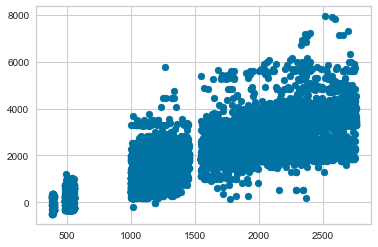

In [111]:
plt.scatter(T_test,y_ls)

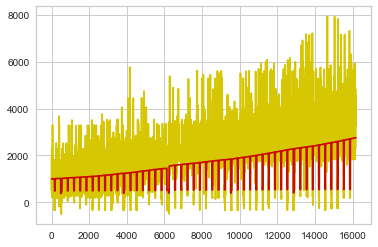

In [112]:
plt.plot(y_ls,'y')
plt.plot(T_test,'r')

### Least Squares (LS) method Observation

Above plot shows a graph of predicted output values(y_ls) against actual values(T_test). 'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives the right prediction curve, though the value difference between two is evident. Moreover, we calculated its RMSE value, which is 823.8. 

### Least Mean Squares

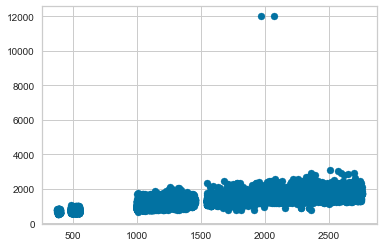

In [113]:
plt.scatter(T_test,y_lms)

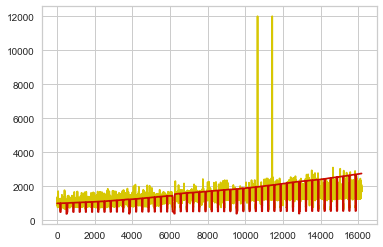

In [114]:
plt.plot(y_lms,'y')
plt.plot(T_test,'r')

### Least Mean Squares (LMS) method Observation

Above plot shows a graph of predicted output values(y_lms) against actual values(T_test).'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives a better-fitted prediction curve , also, the value difference between the two got more depressed compared to LS method. Also, we can see few extreme values which are outliers .Ultimately, its RMSE value is also lessened, which is 485.2406782778304. 

## Analysis Or comparison of algorithms

While analyzing the two algorithms, Least Squares (LS) and Least Mean Squares (LMS), LMS is a less sensitive, or more robust, fitting technique than least squares.

The linear least squares (LS) fitting technique is the simplest and most commonly applied form of linear regression and provides a solution to the problem of finding the best fitting straight line through a set of points, however, it has lack of robustness. Least squares performs poorly in terms of robustness because a single, aberrant data point, or outlier, can throw the fitted line way off.he smallest percentage of bad data that can cause the fitted line to explode is defined as the breakdown point.  Since a single bad data point can destroy the least squares line, LS is said to have a zero breakdown point.  Thus, least squares is not a robust regression procedure.

In LMS, filter weights are optimized, by updating the filter weights in a manner to converge to the optimum filter weight. The algorithm starts by assuming a small weights (zero in most cases), and at each step, by finding the gradient of the mean square error, the weights are updated.That is, if the MSE-gradient is positive, it implies, the error would keep increasing positively, if the same weight is used for further iterations, which means we need to reduce the weights. In the same way, if the gradient is negative, we need to increase the weights. So, the basic weight update equation is: $w^{k+1} = w^{k} - \alpha\nabla E_{k}$ The negative sign indicates that, we need to change the weights in a direction opposite to that of the gradient slope.

In visualization of these two algorithms, plots are plotted to understand the accuracy of predicted values visually. In LS plotting, significance difference in test values in predicted values is found, whereas, in LMS plotting, this difference is reduced significantly. Also, RMSE in LS method is high in comparison to the LMS error.

 # Extra Credit

## what is the most and least significant features for your data.

To determine most relevant and unrelevant features in the dataset, consider below correlation matrix.

In [115]:
corr = diamonds_data.corr()
round(corr,2)

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.95,0.96,0.98
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00,0.02
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.26,0.27,0.28
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.23,-0.21
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.10,0.01
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.18,0.15,0.17
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.89,0.87,0.87,0.90
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.89,1.00,0.97,0.98,0.96
y,0.95,0.03,0.26,-0.22,-0.03,0.18,0.87,0.97,1.00,0.96,0.98
z,0.96,0.00,0.27,-0.23,0.10,0.15,0.87,0.98,0.96,1.00,0.95


Firstly, as per above correlation matrix, 'carat' and 'dimension' are most relevant features to dependent variable 'price'(like we oberved before in visualization section as well), whereas, columns 'clarity','depth','table' are most unrelevant features. Below residual plots and obervations will also justify their relevance or unrelevance to target variable.

Secondly, the remaining features i.e 'cut' and 'color', are not at all related to 'price' variable. So, we can neglect them while forming dataframes with 'most relevant' and 'least relevant' dataframes, without having impact on accuacy of the model.

$\textbf{Most relevant Features}$ : 'carat', 'dimension'

$\textbf{Least relevant Features}$ : 'clarity','depth','table'

$\textbf{Unrelated Features}$ : 'cut','color'

## what are the consequences if you remove those features from the model? (Show your work!)

### Analysis with Most relevant Features i.e Carat and Dimension (Keeping only most relevant features by removing all least related and unrelated features )

In [116]:
X_Dataframe_rel = diamonds_data[['carat','dimension']]  # It's a Training dataframe, partitioned afterwards
y_Dataframe_rel = diamonds_data['price']                # Depandant variable

In [117]:
Xlst_rel, Tlst_rel = partition(pd.DataFrame(X_Dataframe_rel), pd.DataFrame(y_Dataframe_rel))

In [118]:
X_train_rel, X_test_rel = [xx.values for xx in Xlst_rel]
T_train_rel, T_test_rel = [tt.values for tt in Tlst_rel]

#### LS method on most relevant featured dataframe 

In [119]:
ls = LinearRegress()
ls.train(X_train_rel, T_train_rel)
y_ls_rel = ls.use(X_test_rel)

In [120]:
np.sqrt(np.mean((T_test_rel - y_ls_rel)**2))

823.8150290818036

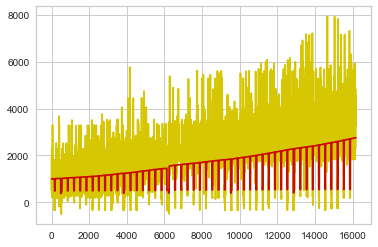

In [121]:
plt.plot(y_ls_rel,'y')
plt.plot(T_test_rel,'r')

Above plot shows a graph of predicted output values(y_ls) against actual values(T_test). 'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives the right prediction curve, though the value difference between two is evident. Moreover, we calculated its RMSE value, which is 823.8. 

#### LMS method on most relevant featured dataframe 

In [122]:
lms = LMS(.000012)
lms.train(X_train_rel, T_train_rel)
y_lms_rel = lms.use(X_test_rel)

In [123]:
np.sqrt(np.mean((T_test_rel - y_lms_rel)**2))

485.2406782778304

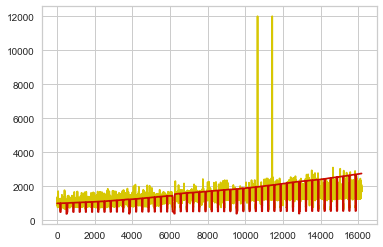

In [124]:
plt.plot(y_lms_rel,'y')
plt.plot(T_test_rel,'r')

Above plot shows a graph of predicted output values(y_lms) against actual values(T_test).'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives a better-fitted prediction curve , also, the value difference between the two got more depressed compared to LS method. Also, we can see few extreme values which are outliers .Ultimately, its RMSE value is also lessened, which is 485.2406782778304. 

### Analysis with Least relevant Features i.e 'clarity','depth', 'table' (Keeping only least relevant features by removing most related and unrelated features )

In [125]:
X_Dataframe_unrel = diamonds_data[['clarity','depth', 'table']]  # It's a Training dataframe, partitioned afterwards
y_Dataframe_unrel = diamonds_data['price']  

In [126]:
Xlst_unrel, Tlst_unrel = partition(pd.DataFrame(X_Dataframe_unrel), pd.DataFrame(y_Dataframe_unrel))

In [127]:
X_train_unrel, X_test_unrel = [xx.values for xx in Xlst_unrel]
T_train_unrel, T_test_unrel = [tt.values for tt in Tlst_unrel]

#### LS method on least relevant featured dataframe 

In [128]:
ls = LinearRegress()
ls.train(X_train_unrel, T_train_unrel)
y_ls_unrel = ls.use(X_test_unrel)

In [129]:
np.sqrt(np.mean((T_test_unrel - y_ls_unrel)**2))

3316.3407454270136

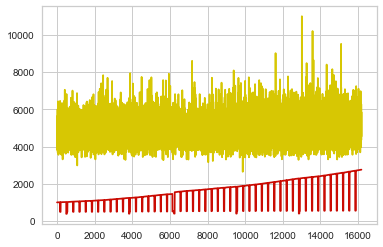

In [130]:
plt.plot(y_ls_unrel,'y')
plt.plot(T_test_unrel,'r')

Above plot shows a graph of predicted output values(y_ls) against actual values(T_test). 'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives the very distant(inaccurate) prediction curve, the value difference between two is extremely evident. Moreover, we calculated its RMSE value, which is 3316.34.

#### LMS method on least relevant featured dataframe 

In [131]:
lms = LMS(.000012)
lms.train(X_train_unrel, T_train_unrel)
y_lms_unrel = lms.use(X_test_unrel)

In [132]:
np.sqrt(np.mean((T_test_unrel - y_lms_unrel)**2))

870.0036077033648

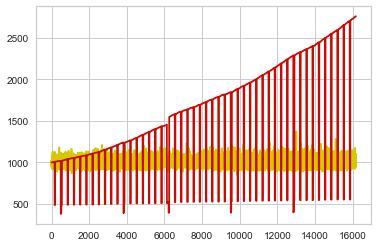

In [133]:
plt.plot(y_lms_unrel,'y')
plt.plot(T_test_unrel,'r')

Above plot shows a graph of predicted output values(y_lms) against actual values(T_test).'Red' color graph shows depicts actual values, whereas, 'yellow' color shows predicted values accordingly. The graph displays the variation of predicted values to that of actual values, which gives the very distant(inaccurate) prediction curve(graph) , though, its RMSE value is lessened compared to LS, which is 870.0036077033648.

## produce residual plots and observe the patterns for the goodness of fit

### Residual plot on most relevant feature dataframe

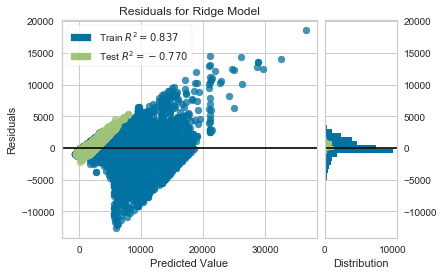

In [134]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_rel, T_train_rel)  # Fit the training data to the visualizer
visualizer.score(X_test_rel, T_test_rel)  # Evaluate the model on the test data
visualizer.poof()

### Residual plot on least relevant feature dataframe

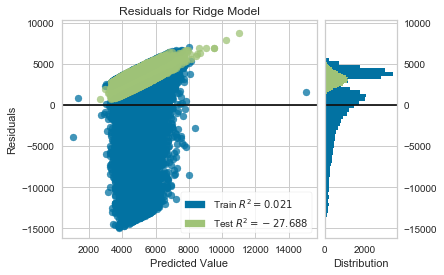

In [136]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_unrel, T_train_unrel)  # Fit the training data to the visualizer
visualizer.score(X_test_unrel, T_test_unrel)  # Evaluate the model on the test data
visualizer.poof()

# Conclusion 

## Conclusion - Assignment 1

In Conclusion, this assignment helped me understand two important linear regression methods in depth via making their actual implementation and visualizing end results

This assignment implemented two regression methods LS (Least Squares) and LMS (Least Mean Squares) to obtain best fitting line on selected regression dataset. I understood that, before implementing these methods, it's essential to apply valuable techniques over input data such as encoding, feature extraction, normalization so that best suited and scaled data would be used in building regression model. While exploring different encoding techniques, I found labelEncoder technique as a best fit for this regression dataset.

As far as both the algorithms are concerned, both of them revolve around error function, calculated by taking the Euclidean distance between predicted and actual value. Both algorithms calculate the best possible weights which when dot product with feature matrix gives us the predicted values, however, the approach that followed is different. Though LS method is most common method because of it's simplicity and effectiveness, it has few limitations in cases like long ranges, data with possibly poor extrapolation properties, and sensitivity to outliers and it becomes increasingly difficult to find a linear model that fits the data well as the range of the data increases. To overcome this problem, LMS method is preferred, where filter weights are optimized, by updating the filter weights in a manner to converge to the optimum filter weight. It's effectiveness is justified by our end results, where, predicted output is relatively closer to test output to that of LS method.

## Conclusion - Extra Credit

As per analysis requirement, LS and LMS methods are performed on dataframes with most relevant data(discarding least relevant and less relevant/unrelevant features) features and with least relevant data(discarding most relevant and less relevant/unrelevant features),and calculated RMSE, visualized different plots including residual plots.

In Conclusion, LMS method performed better compared to LS in both the dataframes irrespetive of their relevance, however, as expected, the dataframe with highly correlated featured performed way better than that of dataframe with least correlated features.

RMSE calculated in both cases as below : 

1 : $\textbf{Most releavant features dataframe}$ : 
    
    LS RMSE : 823.8150290818036
    LMS RMSE : 485.2406782778304 
    
2 : $\textbf{Least releavant features dataframe}$ : 
    
    LS RMSE : 3316.3407454270136
    LMS RMSE :  870.0036077033648
    
Residual plots drawn justifies the above fact as well, that training the model(using either with LS or LMS) on the dataset with most relevant features, proves to be a better fit on linear data, on the contrary, dataset with least relevant features, proves to be a bad fit on linear data.

Accracy calculated in both cases as below :

1 : $\textbf{Most releavant features dataframe}$ : $r^{2}$ = 0.837
    
2 : $\textbf{Least releavant features dataframe}$ : $r^{2}$ = 0.021

# References

shivamagrawal, "Analyze diamonds by their cut, color, clarity, price, and other attributes" https://www.kaggle.com/shivam2503/diamonds#diamonds.csv

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017 https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html 
(https://matplotlib.org/tutorials/introductory/sample_plots.html)

JYOTI DHIMAN1, SHADAB AHMAD2, KULDEEP GULIA3 "Comparison between Adaptive filter Algorithms(LMS, NLMS and RLS)" https://pdfs.semanticscholar.org/ae26/1153face27a228b0ff2697919a3311e3962d.pdf

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/ (http://www.numpy.org/)

Statwing Documentation http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/

Latex Symbols https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols